# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier

# Reading data file

In [2]:
df = pd.read_csv("voice.csv")

# Converting Categorical Values into Numerical Values

In [3]:
df['label']  = [1 if i == "male" else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [4]:
# Extracting target/ class labels
y = df.label.values

#Extracting data attributes
x = df.drop(["label"],axis=1)

print('Number of examples in the data:', x.shape)

Number of examples in the data: (3168, 20)


# Splitting Dataset into Training and Testing Set

In [5]:
#Using the train_test_split to create train and test sets.
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.2,random_state = 50)

# Training the Model

In [6]:
import time
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
start = time.perf_counter()
gb.fit(x_train, y_train)
end = time.perf_counter()
print("Accuracy on training set: {:.5f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(gb.score(x_test, y_test)))
predications = gb.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : "+str(end-start))

Accuracy on training set: 0.99684
Accuracy on test set: 0.97003
Out of total 634 samples 615 samples were predicted correctly
Time Taken : 0.8651819000000005


# Classification Report

In [7]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['male', 'female']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [8]:
classify(gb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

        male     0.9664    0.9753    0.9708       324
      female     0.9739    0.9645    0.9692       310

    accuracy                         0.9700       634
   macro avg     0.9702    0.9699    0.9700       634
weighted avg     0.9701    0.9700    0.9700       634



In [9]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
kappascore =cohen_kappa_score(y_test,predications)
prescor = precision_score(y_test, predications)

In [10]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9700315457413249
Precision score :0.9739413680781759
Recall score :0.964516129032258
F1 score :0.9692058346839546


# Confusion Matrix

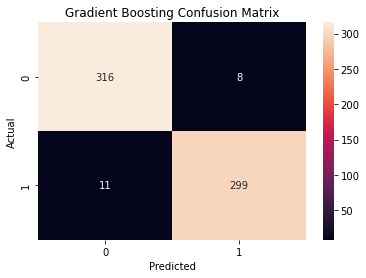

In [11]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# ROC Curve

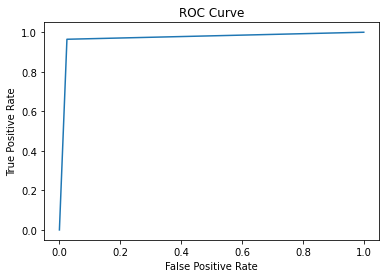

Area Under ROC Curve: 0.9699123855037832


In [12]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Feature Selection

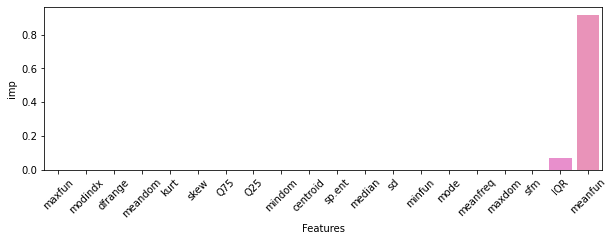

In [13]:
imp = gb.feature_importances_
data = pd.DataFrame({"Features": x_train.columns,"imp":imp})
data.set_index("imp")
data = data.sort_values("imp")
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sb.barplot(x="Features",y="imp",data=data)

# Grid Search CV

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,2,3,4,5],
    "learning_rate":[0.01,0.075,0.1,0.25,0.5,0.75,1]
}

In [32]:
from sklearn.model_selection import GridSearchCV
gradient_boosting = GridSearchCV(gb,parameters,cv=10,return_train_score=False)
gradient_boosting.fit(x_train,y_train)
gradient_boosting.cv_results_

{'mean_fit_time': array([0.03505569, 0.28845713, 0.58902583, 0.05810075, 0.51847889,
        1.03191023, 0.07436273, 0.78299968, 1.58197265, 0.10161726,
        1.03189461, 2.03115644, 0.12671485, 1.31211929, 2.42040045,
        0.03226483, 0.28187211, 0.55199642, 0.05340254, 0.51404731,
        1.02578189, 0.08063624, 0.76141536, 1.50139179, 0.10026515,
        0.96037877, 1.92788026, 0.12046862, 1.19996684, 2.38701859,
        0.02823219, 0.27649219, 0.55267532, 0.05620842, 0.51624756,
        1.02518041, 0.07497706, 0.73494658, 1.51205754, 0.1041698 ,
        0.97404723, 1.99764962, 0.13589785, 1.30132821, 2.6258985 ,
        0.03139989, 0.28449681, 0.56327236, 0.05394561, 0.54749219,
        1.01488814, 0.07650867, 0.74031715, 1.48449516, 0.10036118,
        0.96550665, 1.94027948, 0.13302927, 1.24933093, 2.58101683,
        0.03087678, 0.27470527, 0.54923794, 0.05413399, 0.52845356,
        1.0499558 , 0.08262289, 0.80069907, 1.55527368, 0.10275154,
        1.02487934, 1.95410044,

In [33]:
gradient_boosting.best_score_

0.982638262114469

In [34]:
gradient_boosting.best_params_

{'learning_rate': 0.75, 'max_depth': 5, 'n_estimators': 100}

In [14]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.75, max_depth=5)
start = time.perf_counter()
model.fit(x_train, y_train)
end = time.perf_counter()
print("Time Taken : "+str(end-start))

Time Taken : 4.375746500000002


In [15]:
from sklearn import metrics 
print("Accuracy on training set: {:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(model.score(x_test, y_test)))
predications = model.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")

Accuracy on training set: 1.00000
Accuracy on test set: 0.97319
Out of total 634 samples 617 samples were predicted correctly


# Classification Report

In [16]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
kappascore =cohen_kappa_score(y_test,predications)
prescor = precision_score(y_test, predications)

In [17]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.973186119873817
Precision score :0.9771986970684039
Recall score :0.967741935483871
F1 score :0.9724473257698542


# ROC Curve

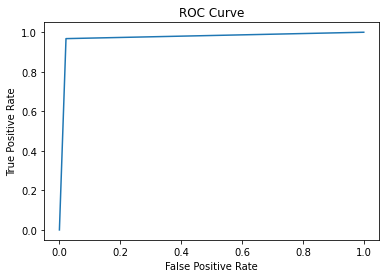

Area Under ROC Curve: 0.973068498606133


In [18]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Confusion Matrix

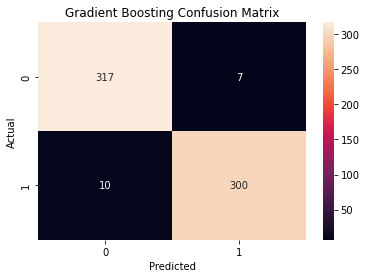

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# Recursive Feature Elimination

In [20]:
from sklearn.feature_selection import RFE
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.75, max_depth=5)
rfe = RFE(estimator = model1,step=1)
rfe.fit(x_train,y_train)
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)


In [21]:
selected_features = pd.DataFrame({'Feature':list(x_train.columns),
                         'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
9,sfm,1
1,sd,1
3,Q25,1
4,Q75,1
5,IQR,1
13,minfun,1
12,meanfun,1
8,sp.ent,1
18,dfrange,1
10,mode,1


In [24]:
start = time.perf_counter()
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb.fit(x_train,y_train)
end = time.perf_counter()
print("Scores :",format(gb.score(x_test,y_test)))
print("Time Taken : "+str(end-start))
start = time.perf_counter()
model1.fit(x_train_selected,y_train)
end = time.perf_counter()
print("Scores After Recursive Feature Elimination :",format(model1.score(x_test_selected,y_test)))
print("Time Taken : "+str(end-start))

Scores : 0.9700315457413249
Time Taken : 0.9748899999999594
Scores After Recursive Feature Elimination : 0.9716088328075709
Time Taken : 2.4073733000000175


# Testing

In [25]:
test = pd.read_csv("Testing.csv")

In [26]:
test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.210115,0.040807,0.207951,0.189843,0.241688,0.051845,1.976478,8.005091,0.893176,0.132964,...,0.210115,0.132198,0.028021,0.275862,1.459780,0.187500,6.500000,6.312500,0.283416,male
1,0.209754,0.043248,0.211459,0.187445,0.243812,0.056367,1.502917,4.804347,0.903864,0.146604,...,0.209754,0.132550,0.020592,0.271186,1.658594,0.000000,6.890625,6.890625,0.228240,male
2,0.204773,0.040299,0.206353,0.187319,0.228945,0.041626,2.029097,7.157829,0.889091,0.133677,...,0.204773,0.135180,0.051948,0.275862,1.351283,0.187500,6.664062,6.476562,0.295135,male
3,0.209101,0.037820,0.211808,0.189077,0.231439,0.042362,2.140739,7.972400,0.881541,0.115100,...,0.209101,0.125872,0.031250,0.228571,0.472656,0.234375,0.820312,0.585938,0.246061,male
4,0.210325,0.045356,0.212845,0.180331,0.249236,0.068906,1.342613,4.600114,0.912661,0.143528,...,0.210325,0.121172,0.017957,0.275862,1.128534,0.179688,6.414062,6.234375,0.199217,male


In [27]:
test['label'] = [1 if i=='male' else 0 for i in test.label]
test.label.value_counts()

1    40
0    40
Name: label, dtype: int64

In [28]:
x = test.drop(['label'],axis=1)
y = test.label.values

In [29]:
x_test = pd.DataFrame(x) 
y_test = pd.DataFrame(y)

In [33]:
predications = gb.predict(x_test)

In [34]:
print('Accuracy Score:   ',end=" ")
print(metrics.accuracy_score(y_test,predications))


Accuracy Score:    0.8375
